In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

# Loading and showing datasets


In [2]:
df2 = pd.read_csv("datafiles\project2.csv")
df2.head()

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,"₹9,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,"₹15,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBTotal Memory128 G...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",Battery Capacity5000 mAh


# Imputing missing values

In [3]:
df2.isnull().mean()*100

name            0.000000
ratings         3.993056
price           0.000000
imgURL          0.000000
storage_ram     1.041667
os_processor    3.645833
camera          2.430556
display         0.520833
network         1.909722
battery         0.520833
dtype: float64

In [4]:
# Data cleaning for the new dataset

# Remove the currency symbol from the price and convert it to an integer
df2['price'] = df2['price'].str.replace('₹', '').str.replace(',', '').astype(int)

# Split the 'storage_ram' field into 'internal_storage', 'ram', and 'expandable_storage'
df2['internal_storage'] = df2['storage_ram'].str.extract('Internal Storage(\d+) GB', expand=False).astype(float)
df2['ram'] = df2['storage_ram'].str.extract('RAM(\d+) GB', expand=False).astype(float)
df2['expandable_storage'] = df2['storage_ram'].str.extract('Expandable Storage(\d+) GB', expand=False).astype(float)

# Split the 'os_processor' field into 'os' and 'processor_type'
df2['os'] = df2['os_processor'].str.extract('Operating System(.+?)Processor', expand=False).str.strip()
df2['processor_type'] = df2['os_processor'].str.extract('Processor Type(.+)', expand=False).str.strip()

# Split the 'camera' field into 'primary_camera', 'secondary_camera', and 'flash_type'
df2['primary_camera'] = df2['camera'].str.extract('Primary Camera(\d+)MP', expand=False).astype(float)
df2['secondary_camera'] = df2['camera'].str.extract('Secondary Camera(\d+)MP', expand=False).astype(float)
df2['flash_type'] = df2['camera'].str.extract('Flash(.+?)', expand=False).str.strip()

# Split the 'display' field into 'display_size', 'resolution', 'display_type', and 'other_display_features'
df2['display_size'] = df2['display'].str.extract('Display Size(.+?) cm', expand=False).str.replace('(', '').astype(float)
df2['resolution'] = df2['display'].str.extract('Resolution(.+?)Pixels', expand=False).str.strip()
df2['display_type'] = df2['display'].str.extract('Display Type(.+?)', expand=False).str.strip()

# Split the 'network' field into 'network_type' and 'supported_networks'
df2['network_type'] = df2['network'].str.extract('Network Type(.+?)Supported', expand=False).str.strip()
df2['supported_networks'] = df2['network'].str.extract('Supported Networks(.+)', expand=False).str.strip()

# Fill missing values in 'battery_capacity' with -1 before converting to integer
df2['battery_capacity'] = df2['battery'].str.extract('Battery Capacity(\d+) mAh', expand=False).fillna(-1).astype(int)

df2.head()

# Drop the original columns
df2.drop(['storage_ram', 'os_processor', 'camera', 'display', 'network', 'battery'], axis=1, inplace=True)

df2.head()

C:\Users\ianim\AppData\Local\Temp\ipykernel_25440\3994838279.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['display_size'] = df2['display'].str.extract('Display Size(.+?) cm', expand=False).str.replace('(', '').astype(float)


,name,ratings,price,imgURL,internal_storage,ram,expandable_storage,os,processor_type,primary_camera,secondary_camera,flash_type,display_size,resolution,display_type,network_type,supported_networks,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,64.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,6.0,NaN,Android 12,Qualcomm Snapdragon 750GProcessor CoreOcta Cor...,50.0,8.0,Y,16.76,2408 x 1080,F,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",5000


In [5]:
df2.isnull()

,name,ratings,price,imgURL,internal_storage,ram,expandable_storage,os,processor_type,primary_camera,secondary_camera,flash_type,display_size,resolution,display_type,network_type,supported_networks,battery_capacity
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
572,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
573,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
574,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [6]:
df2.isnull().mean()*100


name                   0.000000
ratings                3.993056
price                  0.000000
imgURL                 0.000000
internal_storage       6.770833
ram                    6.944444
expandable_storage    78.819444
os                     5.902778
processor_type        28.125000
primary_camera         6.250000
secondary_camera      26.041667
flash_type            31.423611
display_size           0.520833
resolution            38.194444
display_type          26.909722
network_type           1.909722
supported_networks     1.909722
battery_capacity       0.000000
dtype: float64

In [7]:
df2.drop(['expandable_storage', 'processor_type', 'secondary_camera', 'flash_type', 'resolution', 'display_type'], axis=1, inplace=True)
df2.head()

,name,ratings,price,imgURL,internal_storage,ram,os,primary_camera,display_size,network_type,supported_networks,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,64.0,4.0,Android 12,50.0,16.76,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,Android 12,50.0,16.76,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,Android 12,50.0,16.76,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,Android 12,50.0,16.76,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,6.0,Android 12,50.0,16.76,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",5000


In [8]:
df2.isnull().mean()*100

name                  0.000000
ratings               3.993056
price                 0.000000
imgURL                0.000000
internal_storage      6.770833
ram                   6.944444
os                    5.902778
primary_camera        6.250000
display_size          0.520833
network_type          1.909722
supported_networks    1.909722
battery_capacity      0.000000
dtype: float64

In [9]:
df2['network_type'][df2['network_type'].isnull()] = df2['network_type'].dropna().sample(df2['network_type'].isnull().sum()).values


df2['supported_networks'][df2['supported_networks'].isnull()] = df2['supported_networks'].dropna().sample(df2['supported_networks'].isnull().sum()).values


df2['ratings'][df2['ratings'].isnull()] = df2['ratings'].dropna().sample(df2['ratings'].isnull().sum()).values


df2['os'][df2['os'].isnull()] = df2['os'].dropna().sample(df2['os'].isnull().sum()).values

C:\Users\ianim\AppData\Local\Temp\ipykernel_25440\2047035006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['network_type'][df2['network_type'].isnull()] = df2['network_type'].dropna().sample(df2['network_type'].isnull().sum()).values
C:\Users\ianim\AppData\Local\Temp\ipykernel_25440\2047035006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['supported_networks'][df2['supported_networks'].isnull()] = df2['supported_networks'].dropna().sample(df2['supported_networks'].isnull().sum()).values
C:\Users\ianim\AppData\Local\Temp\ipykernel_25440\2047035006.py:7: SettingWithCopyWarning: 
A value is trying to b

In [10]:
df2.isnull().mean()*100

name                  0.000000
ratings               0.000000
price                 0.000000
imgURL                0.000000
internal_storage      6.770833
ram                   6.944444
os                    0.000000
primary_camera        6.250000
display_size          0.520833
network_type          0.000000
supported_networks    0.000000
battery_capacity      0.000000
dtype: float64

In [11]:
X = df2[['ratings', 'price', 'internal_storage', 'ram', 'primary_camera', 'display_size', 'battery_capacity']]
X.head()

,ratings,price,internal_storage,ram,primary_camera,display_size,battery_capacity
0,4.3,9499,64.0,4.0,50.0,16.76,6000
1,4.3,10499,128.0,4.0,50.0,16.76,6000
2,4.3,10499,128.0,4.0,50.0,16.76,6000
3,4.3,10499,128.0,4.0,50.0,16.76,6000
4,4.3,15499,128.0,6.0,50.0,16.76,5000


In [12]:
knn = KNNImputer(n_neighbors=8)

imputed_data = knn.fit_transform(X)

X2 = pd.DataFrame(imputed_data, columns=X.columns)

In [13]:
X2.isnull().mean()*100

ratings             0.0
price               0.0
internal_storage    0.0
ram                 0.0
primary_camera      0.0
display_size        0.0
battery_capacity    0.0
dtype: float64

In [14]:
X1 = df2[['name', 'imgURL', 'os', 'network_type', 'supported_networks']]
df3 = pd.concat([X1, X2], axis = 1)
df3

,name,imgURL,os,network_type,supported_networks,ratings,price,internal_storage,ram,primary_camera,display_size,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,9499.0,64.0,4.0,50.0,16.76,6000.0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",4.3,15499.0,128.0,6.0,50.0,16.76,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",https://rukminim2.flixcart.com/image/312/312/k...,Android Pie 9.0,"3G, 4G, 2G","GSM, WCDMA, 4G LTEInternet Connectivity4G, Wi-...",4.3,16199.0,64.0,4.0,25.0,16.26,4000.0
572,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",https://rukminim2.flixcart.com/image/312/312/j...,Android Oreo 8.1,"3G, 4G, 2G","GSM, WCDMA, 4G LTEInternet Connectivity4G, 3G,...",4.4,9000.0,32.0,2.0,13.0,15.24,3300.0
573,"SAMSUNG Galaxy A71 (Prism Crush Black, 128 GB)",https://rukminim2.flixcart.com/image/312/312/k...,Android 10,"4G VOLTE, 4G, 3G, 2G","4G VoLTE, 4G LTE, WCDMA, GSMGPRSYesPre-install...",4.2,34999.0,128.0,8.0,64.0,17.02,4500.0
574,"SAMSUNG Galaxy M01s (Gray, 32 GB)",https://rukminim2.flixcart.com/image/312/312/k...,Android Pie 9,"4G VOLTE, 3G","4G VoLTE, GSMInternet Connectivity2G GSM, 3G W...",4.3,10999.0,32.0,3.0,13.0,15.75,4000.0


In [15]:
df3.isnull().mean()*100

name                  0.0
imgURL                0.0
os                    0.0
network_type          0.0
supported_networks    0.0
ratings               0.0
price                 0.0
internal_storage      0.0
ram                   0.0
primary_camera        0.0
display_size          0.0
battery_capacity      0.0
dtype: float64

# Plotting density graphs

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

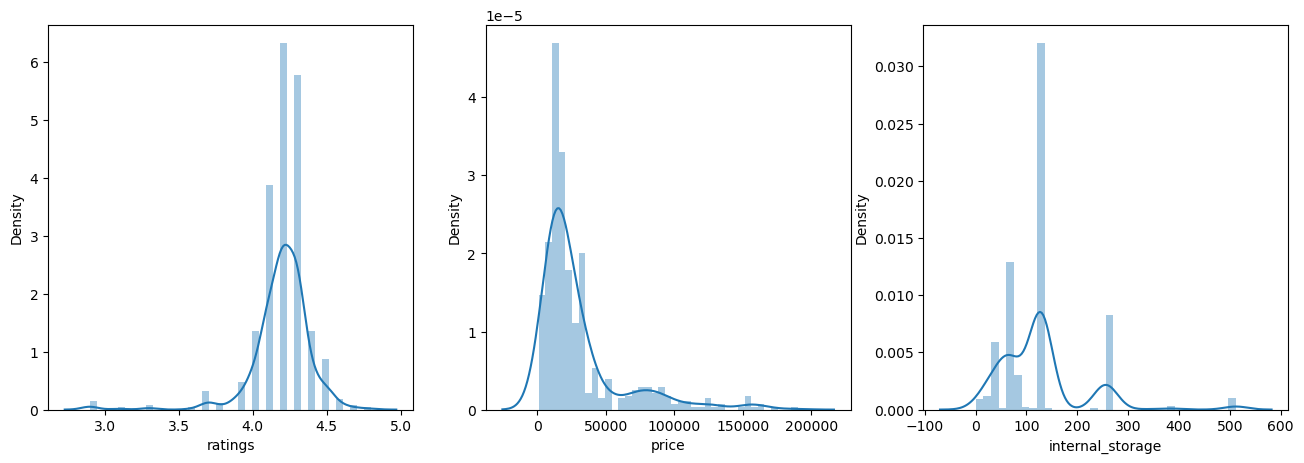

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df3['ratings'])

plt.subplot(1,3,2)
sns.distplot(df3['price'])

plt.subplot(1,3,3)
sns.distplot(df3['internal_storage'])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

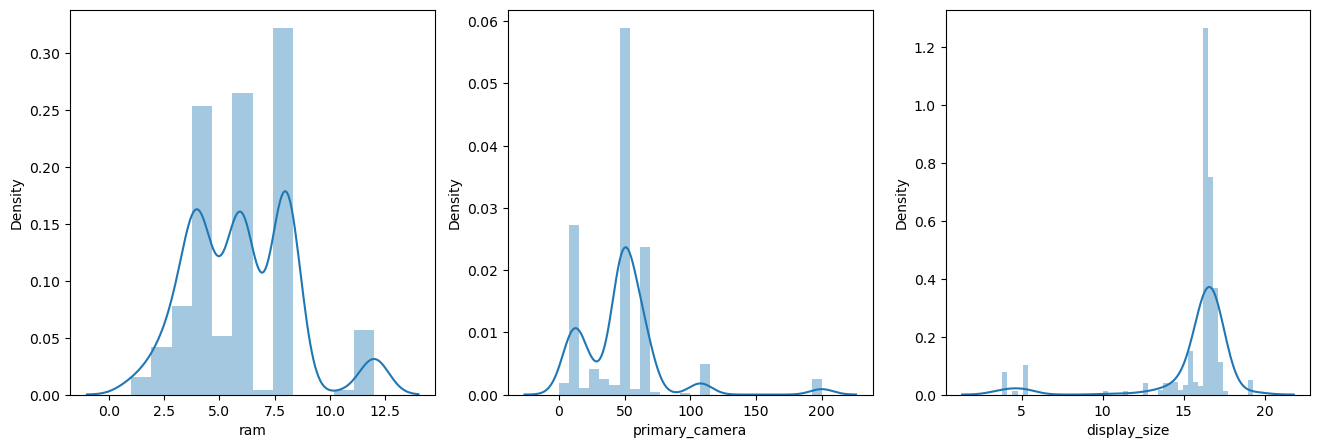

In [17]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.distplot(df3['ram'])

plt.subplot(1,3,2)
sns.distplot(df3['primary_camera'])

plt.subplot(1,3,3)
sns.distplot(df3['display_size'])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


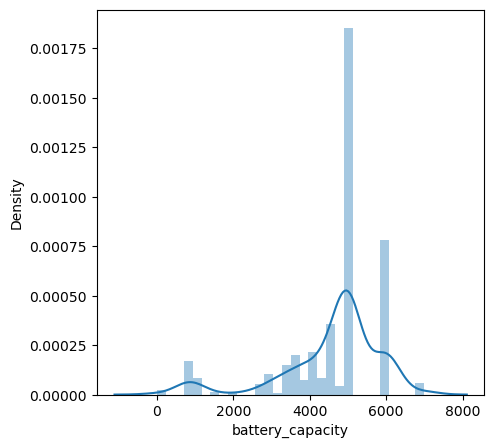

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(df3['battery_capacity'])
plt.show()

# One hot encoding

In [19]:
df3['network_type'].value_counts()

5G, 4G, 3G, 2G              136
4G, 3G, 2G                  130
5G                           56
4G VOLTE                     39
3G, 4G, 2G                   34
4G VOLTE, 4G, 3G, 2G         33
2G                           25
4G                           24
2G, 3G, 4G, 5G               20
4G VOLTE, 3G                 18
2G, 3G, 4G VOLTE, 5G         13
3G, 4G VOLTE, 4G, 2G         10
3G, 4G VOLTE, 2G              8
5G, 4G VOLTE                  7
2G, 3G, 4G                    6
5G, 4G VOLTE, 4G, 3G, 2G      5
3G                            3
4G VOLTE, 3G, 4G, 2G          2
3G, 4G                        2
4G, 4G VOLTE, 3G              2
5G, 4G VOLTE, 3G              1
5G, 4G                        1
3G, 2G                        1
Name: network_type, dtype: int64

In [20]:
counts = df3['network_type'].value_counts()
df3['network_type'].nunique()
threshold = 100
repl = counts[counts <= threshold].index
Y = pd.get_dummies(df3['network_type'].replace(repl, 'uncommon'),drop_first = True)
Y.head()

,"5G, 4G, 3G, 2G",uncommon
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [21]:
counts = df3['os'].value_counts()
df3['os'].nunique()
threshold = 50
repl = counts[counts <= threshold].index
Z = pd.get_dummies(df3['os'].replace(repl, 'others'),drop_first = True)
Z.head()

,Android 11,Android 12,Android 13,others
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [22]:
D = pd.concat([Y,Z], axis = 1)
D.head()

,"5G, 4G, 3G, 2G",uncommon,Android 11,Android 12,Android 13,others
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,1,0,0,1,0,0


In [23]:
df4 = pd.concat([df3,D], axis = 1)
df4.head()

,name,imgURL,os,network_type,supported_networks,ratings,price,internal_storage,ram,primary_camera,display_size,battery_capacity,"5G, 4G, 3G, 2G",uncommon,Android 11,Android 12,Android 13,others
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,9499.0,64.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",4.3,15499.0,128.0,6.0,50.0,16.76,5000.0,1,0,0,1,0,0


In [24]:
df4.drop(['imgURL','os','network_type','supported_networks',],axis=1,inplace=True)
df4.head()


,name,ratings,price,internal_storage,ram,primary_camera,display_size,battery_capacity,"5G, 4G, 3G, 2G",uncommon,Android 11,Android 12,Android 13,others
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499.0,64.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499.0,128.0,6.0,50.0,16.76,5000.0,1,0,0,1,0,0


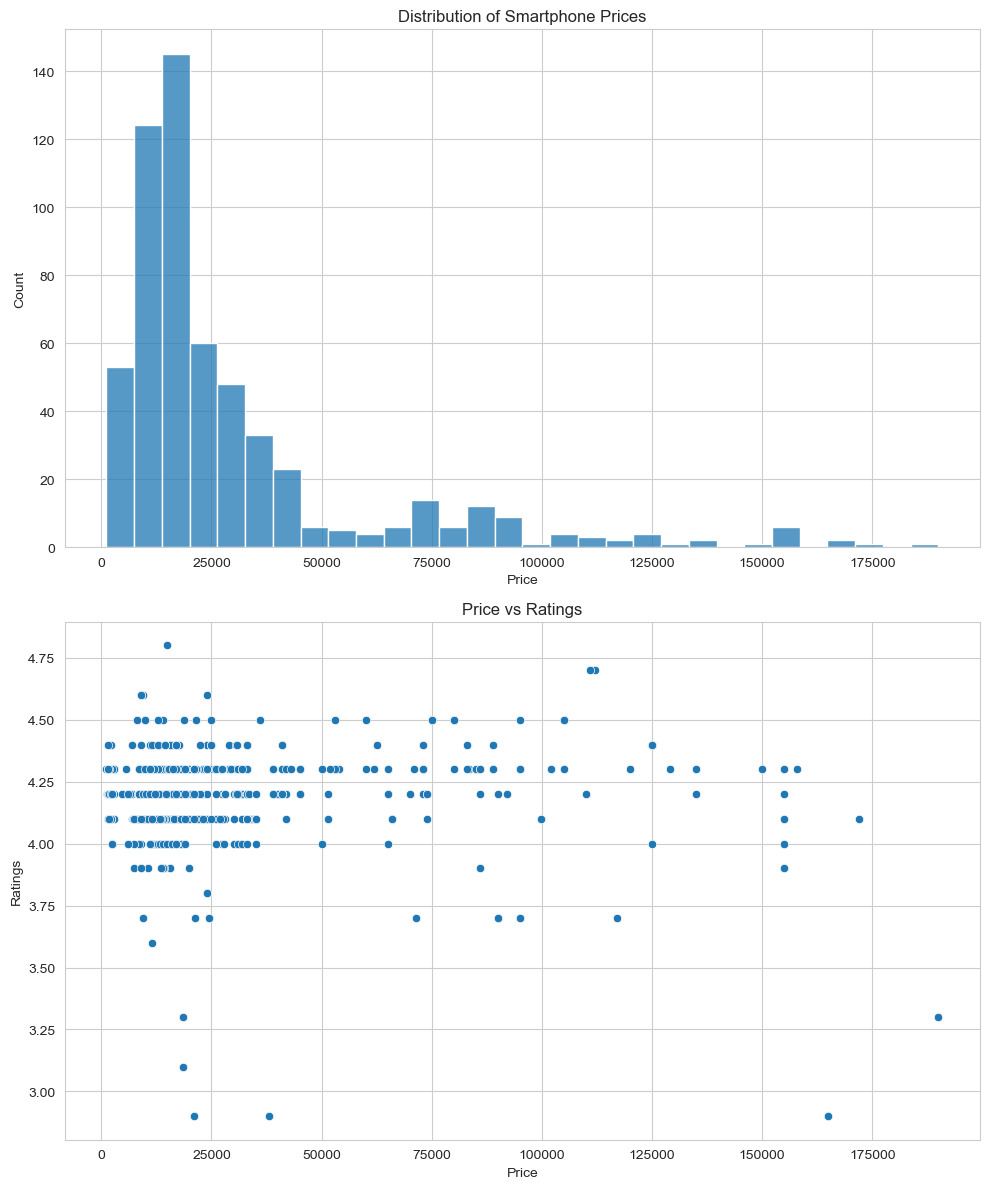

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Histogram of prices
sns.histplot(df4['price'], bins=30, ax=ax1)
ax1.set_title('Distribution of Smartphone Prices')
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')

# Scatter plot of prices and ratings
sns.scatterplot(data=df4, x='price', y='ratings', ax=ax2)
ax2.set_title('Price vs Ratings')
ax2.set_xlabel('Price')
ax2.set_ylabel('Ratings')

# Display the plots
plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Select numeric features
features = ['ratings', 'price', 'internal_storage', 'ram', 'primary_camera', 'display_size', 'battery_capacity','5G, 4G, 3G, 2G','uncommon','Android 11','Android 12','Android 13','others']
data_subset = df4[features]

# Standardize the features
scaler = StandardScaler()
data_subset_scaled = scaler.fit_transform(data_subset)
similarity_matrix = cosine_similarity(data_subset_scaled[:])
similarity_matrix

array([[ 1.        ,  0.96446259,  0.96446259, ..., -0.27872409,
        -0.03781156, -0.53799029],
       [ 0.96446259,  1.        ,  1.        , ..., -0.28264987,
        -0.14317529, -0.5472244 ],
       [ 0.96446259,  1.        ,  1.        , ..., -0.28264987,
        -0.14317529, -0.5472244 ],
       ...,
       [-0.27872409, -0.28264987, -0.28264987, ...,  1.        ,
        -0.14731228,  0.35337003],
       [-0.03781156, -0.14317529, -0.14317529, ..., -0.14731228,
         1.        ,  0.27582101],
       [-0.53799029, -0.5472244 , -0.5472244 , ...,  0.35337003,
         0.27582101,  1.        ]])

# OPTIMAL NUMBER OF CLUSTERS

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


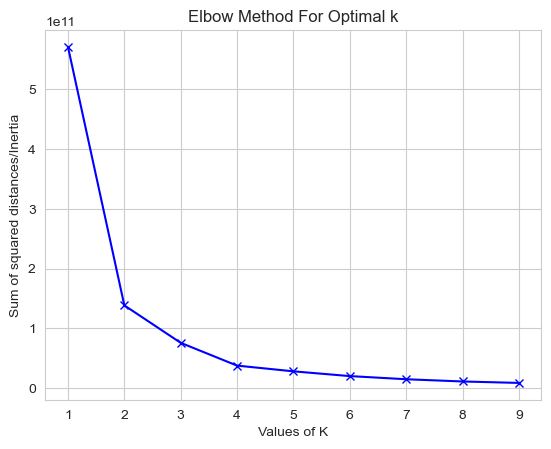

In [27]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_subset)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
data_subset.head()

,ratings,price,internal_storage,ram,primary_camera,display_size,battery_capacity,"5G, 4G, 3G, 2G",uncommon,Android 11,Android 12,Android 13,others
0,4.3,9499.0,64.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
1,4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
2,4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
3,4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
4,4.3,15499.0,128.0,6.0,50.0,16.76,5000.0,1,0,0,1,0,0


In [29]:
#Since graphs suggest that Values of K should be 4 because of elbow method
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df4[features])
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)
# Add the cluster labels to the original DataFrame
df4['cluster'] = kmeans.labels_
# Print the number of phones in each cluster
print(df4['cluster'].value_counts())

1    331
2    136
0    109
Name: cluster, dtype: int64


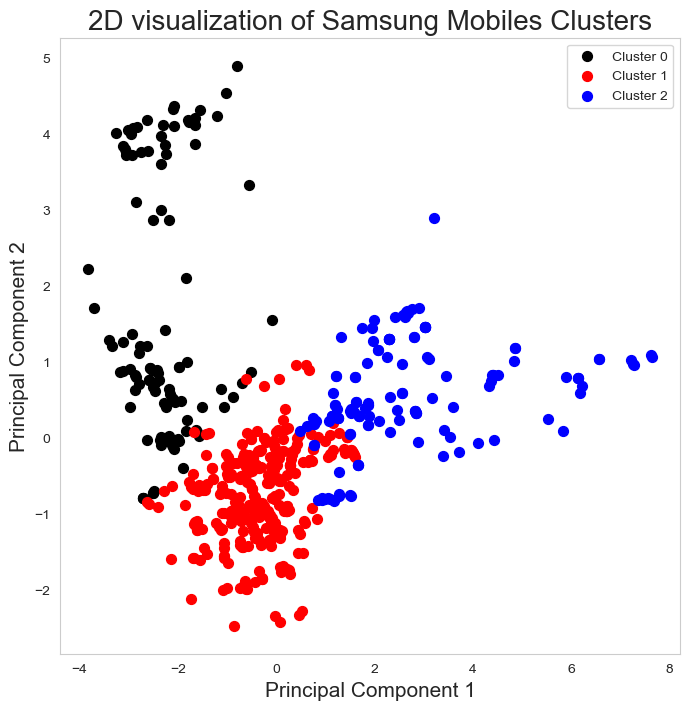

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_data = pca.fit_transform(data_scaled)

# Create a DataFrame with the two principal components
principal_df = pd.DataFrame(data=principal_data, columns=['principal component 1', 'principal component 2'])

# Concatenate the clusters labels to the DataFrame
final_df = pd.concat([principal_df, df4[['cluster']]], axis=1)

# Plot the clusters
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D visualization of Samsung Mobiles Clusters', fontsize=20)

colors = ['black', 'red', 'blue']
for cluster in range(3):
    indicesToKeep = final_df['cluster'] == cluster
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'], final_df.loc[indicesToKeep, 'principal component 2'], c=colors[cluster], s=50)

ax.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
ax.grid()

# Summary of clusters 

In [31]:
cluster_characteristics = df4.groupby('cluster')[features].mean()
print(cluster_characteristics)

          ratings         price  internal_storage       ram  primary_camera  \
cluster                                                                       
0        4.254128  12834.623853         58.330275  4.003440       24.588303   
1        4.183082  20943.036254        112.000000  5.632931       47.649924   
2        4.180882  65168.904412        210.352941  8.419118       65.303309   

         display_size  battery_capacity  5G, 4G, 3G, 2G  uncommon  Android 11  \
cluster                                                                         
0           11.598750       2596.770642        0.036697  0.788991    0.055046   
1           16.559094       5257.401813        0.015106  0.658610    0.226586   
2           16.793051       4561.757353        0.933824  0.044118    0.169118   

         Android 12  Android 13    others  
cluster                                    
0          0.110092    0.036697  0.706422  
1          0.214502    0.135952  0.283988  
2          0.455882   

In [32]:
print(df4.corr()['price'])
df4.rename(columns = {'5G, 4G, 3G, 2G':'Network'},inplace=True)

ratings            -0.058126
price               1.000000
internal_storage    0.743995
ram                 0.749667
primary_camera      0.426825
display_size        0.318773
battery_capacity   -0.003029
5G, 4G, 3G, 2G      0.506370
uncommon           -0.244499
Android 11         -0.054323
Android 12          0.087468
Android 13          0.228866
others             -0.207575
cluster             0.565089
Name: price, dtype: float64


In [33]:
df4['price'].mean()

29850.850694444445

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error


# Select relevant columns for model training
selected_columns = ['internal_storage', 'ram', 'primary_camera', 'display_size','cluster','Network','Android 13', 'price']
data_selected = df4[selected_columns]

# Drop rows with missing target values (price) if any
data_selected = data_selected.dropna(subset=['price'])

# Separate features (X) and target (y)
X = data_selected.drop(columns=['price'])
y = data_selected['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize all the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=1),
    RandomForestRegressor(n_estimators=100, random_state=1), 
    GradientBoostingRegressor(random_state=0)
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate the mean absolute error of the predictions
    mae = mean_absolute_error(y_test, predictions)
    R2score = r2_score(y_test,predictions)
    Adjustedr2score = 1-((1-R2score)*(116-1)/(116-7-1))
    print(f"{model_name} R2 Score:",R2score)
    print(f"{model_name} Adjusted R2 Score:",Adjustedr2score)
    print(f"{model_name} MAE:",mae)
    print('---------------------------------------------------------------')

LinearRegression R2 Score: 0.6119999390868672
LinearRegression Adjusted R2 Score: 0.5868517869906458
LinearRegression MAE: 13412.157980753236
---------------------------------------------------------------
DecisionTreeRegressor R2 Score: 0.9256538240033015
DecisionTreeRegressor Adjusted R2 Score: 0.9208350903738859
DecisionTreeRegressor MAE: 3925.7709045504303
---------------------------------------------------------------
RandomForestRegressor R2 Score: 0.9421451216622799
RandomForestRegressor Adjusted R2 Score: 0.938395268436687
RandomForestRegressor MAE: 4460.470873542442
---------------------------------------------------------------
GradientBoostingRegressor R2 Score: 0.9166289230877691
GradientBoostingRegressor Adjusted R2 Score: 0.9112252421767912
GradientBoostingRegressor MAE: 5647.254744193719
---------------------------------------------------------------


In [35]:
scolumns=['internal_storage', 'ram', 'primary_camera', 'display_size','cluster','Network','Android 13', 'price']
important_features_data = df4[scolumns]

# Step 2: Prepare the data for modeling
X = important_features_data[['internal_storage', 'ram', 'primary_camera', 'display_size','cluster','Network','Android 13']]
y = important_features_data['price']

# Step 3: Train the RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Assuming you have already split the data into training and testing sets, and X_train, y_train are the training data.
# You can also use the entire dataset for training if you prefer.
model = DecisionTreeRegressor()
model.fit(X, y)

# Step 4: Get the feature importances
feature_importances = model.feature_importances_

# Step 5: Sort and display the important features
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

            Feature  Importance
1               ram    0.753730
3      display_size    0.096109
2    primary_camera    0.076599
4           cluster    0.037295
0  internal_storage    0.025386
5           Network    0.007067
6        Android 13    0.003813


In [36]:
import ipywidgets as widgets

from IPython.display import display

from sklearn.preprocessing import StandardScaler

from sklearn.metrics.pairwise import cosine_similarity

def recommendator(prod_name,data,features):
    
    scale=StandardScaler()
    scaled_data=scale.fit_transform(data[features])
    
    df5=pd.DataFrame(scaled_data,index=data.index,columns=features)
    similarity=cosine_similarity(df5)
    
    product_similarities = pd.Series(similarity_matrix[data.index[data['name'] == prod_name][0]], index=data['name'])
    top_result=product_similarities.sort_values(ascending=False).head()
    
    top_result=top_result.iloc[1:]
    return top_result

product_dropdown = widgets.Dropdown(options=df4['name'].unique(),description='Product:',disabled=False,)
recommend_button=widgets.Button(description="Recommend")

output=widgets.Output()
display(product_dropdown, recommend_button, output)

def recommend(button):
  
    output.clear_output()
    product_name = product_dropdown.value

    features = ['internal_storage', 'ram', 'primary_camera', 'display_size', 'battery_capacity']
    recommendations = recommendator(product_name, df4, features)
    
    # Display recommendations
    with output:
        for product in recommendations.index:
            print(f"Product: {product}, Similarity Score: {recommendations[product]}")

recommend_button.on_click(recommend)

Dropdown(description='Product:', options=('SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)', 'SAMSUNG Galaxy F13 (W…

Button(description='Recommend', style=ButtonStyle())

Output()

In [37]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

def predict_price(internal_storage,ram,primary_camera,display_size,cluster,network,android):
    
    input_data = pd.DataFrame({
        'internal_storage':[internal_storage],
        'ram': [ram],
        'primary_camera':[primary_camera],
        'display_size':[display_size],
        'cluster': [cluster],
        'Network':[network],
        'Android 13':[android]
    })

    input_data_filled = input_data.fillna(input_data.mean())

    price_prediction = models[-3].predict(input_data_filled)[0]

    return price_prediction

ram_input = widgets.IntSlider(description='RAM (GB):', min=0.0, max=16.0, step=2, value=4.0)

display_input=widgets.FloatSlider(description='Display(in):',min=3.0,max=16,step=0.1,value=6.2)

primary_camera_input=widgets.IntSlider(description='Primary Camera(MP):',min=10,max=150,step=1,value=12)

cluster_options = [('Low End',0), ('Budget End',1), ('Flagship/High End',2)]

cluster_input = widgets.Dropdown(description='Budget', options=cluster_options, value=0)

internal_storage_input=widgets.IntSlider(description="Internal Storage(GB):",min=16,max=512,step=8,value=128)

android_input=widgets.IntSlider(description='Android Version:',min=10,max=15,step=1,value=13)

network_option=[('5G/4G',0),('4G',1),('3G',2)]

network_input=widgets.Dropdown(description="Connectivity:",options=network_option,value=0)

predict_button = widgets.Button(description='Predict Price')

output = widgets.Output()

def on_predict_button_click(button):

    output.clear_output()
    
    ram = ram_input.value
    
    display_size=display_input.value
    
    primary_cam=primary_camera_input.value
    
    cluster = cluster_input.value

    internal_storage=internal_storage_input.value
    
    android=android_input.value
    
    network=network_input.value
        
    price_prediction = predict_price(internal_storage, ram, primary_cam, display_size,cluster,network,android)

    with output:
        print(f"Predicted Price: ₹ {price_prediction:.2f}")

predict_button.on_click(on_predict_button_click)

display(ram_input,display_input,primary_camera_input,cluster_input,internal_storage_input,network_input,android_input,predict_button, output)

IntSlider(value=4, description='RAM (GB):', max=16, step=2)

FloatSlider(value=6.2, description='Display(in):', max=16.0, min=3.0)

IntSlider(value=12, description='Primary Camera(MP):', max=150, min=10)

Dropdown(description='Budget', options=(('Low End', 0), ('Budget End', 1), ('Flagship/High End', 2)), value=0)

IntSlider(value=128, description='Internal Storage(GB):', max=512, min=16, step=8)

Dropdown(description='Connectivity:', options=(('5G/4G', 0), ('4G', 1), ('3G', 2)), value=0)

IntSlider(value=13, description='Android Version:', max=15, min=10)

Button(description='Predict Price', style=ButtonStyle())

Output()